# Challenge: Test Set

In [12]:
import pandas
import itertools

In [13]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [14]:
movies = catalog.load("movies")

2021-03-16 12:40:46,511 - kedro.io.data_catalog - INFO - Loading data from `movies` (ParquetDataSet)...


In [15]:
movies

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path,genre_names
id,,,,,,,,,,,,,,,,,,,,,
2,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,,Ariel,False,6.8,128,NaN,None,None,None,"[Drama, Crime, Comedy]"
3,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,,Shadows in Paradise,False,7.2,125,NaN,None,None,None,"[Drama, Comedy]"
5,False,/u0zMKKpEdDWpOKmFW2sLbKKICJH.jpg,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,5.7,1901,NaN,None,None,None,"[Crime, Comedy]"
6,False,/5aXp2s4l6g5PcMMesIj63mx8hmJ.jpg,NaN,21000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",...,Don't move. Don't whisper. Don't even breathe.,Judgment Night,False,6.5,184,NaN,None,None,None,"[Action, Thriller, Crime]"
8,False,None,NaN,42000,"[{'id': 99, 'name': 'Documentary'}]",http://www.lifeinloops.com,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,...,A Megacities remix.,Life in Loops (A Megacities RMX),False,7.3,13,NaN,None,None,None,[Documentary]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,/AmHOQ7rpHwiaUMRjKXztnauSJb7.jpg,NaN,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,Enter the World of Pandora.,Avatar,False,7.5,23025,87096.0,Avatar Collection,/gC3tW9a45RGOzzSh6wv91pFnmFr.jpg,/syGPZuzcHBBHMLiNDN0x0Tms4Fk.jpg,"[Action, Adventure, Fantasy, Science Fiction]"
19996,False,None,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",,tt0932661,en,Brother's War,The story is set in the latter days of World W...,...,,Brother's War,False,3.9,14,NaN,None,None,None,"[Action, Drama]"
19997,False,/TNfPn4Fwi0Fqx4BsjxOL3Tmscw.jpg,NaN,1250000,"[{'id': 53, 'name': 'Thriller'}]",,tt0046126,en,Niagara,"Rose Loomis and her older, gloomier husband, G...",...,A raging torrent of emotion that even nature c...,Niagara,False,6.8,214,NaN,None,None,None,[Thriller]


**filter movies without posters**

In [16]:
from PIL import Image

In [17]:
poster_dir = "../data/01_raw/posters"
def test_poster(poster_path):
    img_path = f"{poster_dir}{poster_path}"
    try:
        with Image.open(img_path) as img:
            return True
    except:
        return False

In [18]:
movies["has_poster"] = movies["poster_path"].apply(
    test_poster
)

In [19]:
movies["has_poster"].value_counts()

True     11329
False      757
Name: has_poster, dtype: int64

In [20]:
movies = movies[movies["has_poster"]]

In [21]:
movies_test = movies[["original_title", "poster_path", "genre_names"]].sample(n=1000)

In [22]:
movies_test

,original_title,poster_path,genre_names
id,,,
14813,Mickey's Christmas Carol,/6QH10DqZ0feBW2phvrtoLqT1s0k.jpg,"[Family, Animation]"
7177,Fire from Below,/9eecXogqTUMpsDMNZD8cCA5btMG.jpg,"[Action, Adventure, Science Fiction, Thriller]"
11292,Seventeen - Mädchen sind die besseren Jungs,/oUgbUWfPlAQhKLPnX6N9gAjKkvJ.jpg,[Comedy]
19195,Die Pyramide des Sonnengottes,/tFpTyjKRxdm1KEDMhhZd2KDacm1.jpg,"[Adventure, Western]"
3074,The Ghost of Frankenstein,/7NtCuLtymDBCWBDj5MVxBjzDUPe.jpg,"[Drama, Fantasy, Horror, Science Fiction]"
...,...,...,...
15470,內衣少女,/1J7IreCxYY7q2e0Yy12yyvbEmWB.jpg,"[Comedy, Drama, Romance]"
16218,Le big-Bang,/o4jlPcPQbcYIQ3PLyiCOfP6o2Jd.jpg,"[Animation, Comedy, Science Fiction]"
2637,The Mothman Prophecies,/z2PiOTyjbCOnMHY2QJdq3I4jU44.jpg,"[Drama, Horror, Mystery]"


<AxesSubplot:>

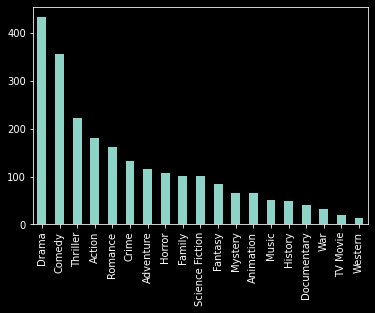

In [23]:
pandas.Series(
    itertools.chain.from_iterable(
        movies_test["genre_names"]
    )
).value_counts().plot(kind="bar")

In [24]:
pandas.Series(
    itertools.chain.from_iterable(
        movies_test["genre_names"]
    )
).value_counts().shape

(19,)

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer

In [26]:
mlb = MultiLabelBinarizer()

In [27]:
mlb.fit(movies["genre_names"])

MultiLabelBinarizer()

In [28]:
genres = pandas.DataFrame(
    mlb.transform(movies_test["genre_names"]),
    columns=mlb.classes_,
    index=movies_test.index,
)

In [29]:
genres

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,
14813,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7177,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
11292,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19195,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3074,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15470,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
16218,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2637,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0


In [30]:
movies_test = movies_test.join(genres)

In [31]:
movies_test.to_csv("movies_test.csv", sep=";")

In [32]:
pandas.read_csv("movies_test.csv", sep=";")

,id,original_title,poster_path,genre_names,Action,Adventure,Animation,Comedy,Crime,Documentary,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,14813,Mickey's Christmas Carol,/6QH10DqZ0feBW2phvrtoLqT1s0k.jpg,['Family' 'Animation'],0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7177,Fire from Below,/9eecXogqTUMpsDMNZD8cCA5btMG.jpg,['Action' 'Adventure' 'Science Fiction' 'Thril...,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,11292,Seventeen - Mädchen sind die besseren Jungs,/oUgbUWfPlAQhKLPnX6N9gAjKkvJ.jpg,['Comedy'],0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19195,Die Pyramide des Sonnengottes,/tFpTyjKRxdm1KEDMhhZd2KDacm1.jpg,['Adventure' 'Western'],0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3074,The Ghost of Frankenstein,/7NtCuLtymDBCWBDj5MVxBjzDUPe.jpg,['Drama' 'Fantasy' 'Horror' 'Science Fiction'],0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15470,內衣少女,/1J7IreCxYY7q2e0Yy12yyvbEmWB.jpg,['Comedy' 'Drama' 'Romance'],0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
996,16218,Le big-Bang,/o4jlPcPQbcYIQ3PLyiCOfP6o2Jd.jpg,['Animation' 'Comedy' 'Science Fiction'],0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
997,2637,The Mothman Prophecies,/z2PiOTyjbCOnMHY2QJdq3I4jU44.jpg,['Drama' 'Horror' 'Mystery'],0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
998,13515,Mirrors,/bt5a4ThyLpLTsia2e2ZTLzQjXO0.jpg,['Horror' 'Mystery' 'Thriller' 'Drama'],0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [33]:
movies_test = catalog.load("movies_test")

2021-03-16 12:41:53,521 - kedro.io.data_catalog - INFO - Loading data from `movies_test` (CSVDataSet)...


In [34]:
movies_test[movies_test["poster_path"].isna()]

,original_title,poster_path,genre_names,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
15118,The Journal,NaN,['Documentary'],0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17011,Mini Punjab,NaN,[],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4458,Ballade pour un voyou,NaN,['Drama'],0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19295,Power Raiders,NaN,[],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8089,Decidme cómo es un árbol,NaN,['Drama'],0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6417,Uită și fugi!,NaN,['Drama'],0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17955,"He Said, She Said",NaN,['Comedy' 'Drama'],0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19355,Madeline At The Ballet,NaN,['Animation'],0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11097,Ich will da sein - Jenny Gröllmann,NaN,['Documentary'],0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
